In [5]:

 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '88f11b84-3eea-49dc-b931-de6786aab43e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-13T07:33:33.488Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 9852}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11771, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [6]:
import pandas as pd

df = pd.json_normalize(data['data'])

Inserting time

In [7]:
df['timestamp'] = pd.Timestamp.now()


In [11]:
def auto_api():

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '88f11b84-3eea-49dc-b931-de6786aab43e',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])

    df2['timestamp'] = pd.Timestamp.now()
    
    import os 
    if not os.path.exists(r'C:\Users\Krishna\Desktop\SQL Practice\Pandas\Api.csv'):
            df.to_csv(r'C:\Users\Krishna\Desktop\SQL Practice\Pandas\Api.csv',header = 'columns_name')
    else : df.to_csv(r'C:\Users\Krishna\Desktop\SQL Practice\Pandas\Api.csv',mode = 'a+', header = False)

running the function using range to not exceed the daily api fetch limit


In [36]:
import time 

for i in range(200) :
    auto_api()
    time.sleep(20)
    print('Api fetched completed')

Api fetched completed
Api fetched completed
Api fetched completed
Api fetched completed
Api fetched completed
Api fetched completed


KeyboardInterrupt: 

reading the data

In [13]:
df3 = pd.read_csv(r'C:\Users\Krishna\Desktop\SQL Practice\Pandas\Api.csv')

df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.976665e+07,...,56.6333,1.325758e+12,NaN,2024-10-12T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:19:31.280602
1,1,1027,Ethereum,ETH,ethereum,9409,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203822e+08,...,13.4928,2.973081e+11,NaN,2024-10-12T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:19:31.280602
2,2,825,Tether USDt,USDT,tether,100127,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.197365e+11,...,5.4332,1.213464e+11,NaN,2024-10-12T15:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-12 21:19:31.280602
3,3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459320e+08,...,3.8145,8.405201e+10,NaN,2024-10-12T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:19:31.280602
4,4,5426,Solana,SOL,solana,757,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.696465e+08,...,3.1126,8.563962e+10,NaN,2024-10-12T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:19:31.280602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,2010,Cardano,ADA,cardano,1267,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.496719e+10,...,0.5639,1.596840e+10,NaN,2024-10-12T15:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:26:06.413330
116,11,5805,Avalanche,AVAX,avalanche,787,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.065932e+08,...,0.5379,2.083621e+10,NaN,2024-10-12T15:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:26:06.413330
117,12,5994,Shiba Inu,SHIB,shiba-inu,883,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.892674e+14,...,0.4787,1.053832e+10,NaN,2024-10-12T15:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-10-12 21:26:06.413330
118,13,1975,Chainlink,LINK,chainlink,1854,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,6.268500e+08,...,0.3160,1.109362e+10,NaN,2024-10-12T15:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-10-12 21:26:06.413330


Fixing the numeric format

In [15]:
pd.set_option('display.float.format', lambda x : '%.5f' % x )

In [17]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19766653.00000,...,56.63330,1325757597879.77002,NaN,2024-10-12T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:19:31.280602
1,1,1027,Ethereum,ETH,ethereum,9409,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120382196.30100,...,13.49280,297308134365.21002,NaN,2024-10-12T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:19:31.280602
2,2,825,Tether USDt,USDT,tether,100127,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119736504562.84830,...,5.43320,121346437148.46001,NaN,2024-10-12T15:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-12 21:19:31.280602
3,3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145932017.13398,...,3.81450,84052011225.31000,NaN,2024-10-12T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:19:31.280602
4,4,5426,Solana,SOL,solana,757,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,469646523.49894,...,3.11260,85639617799.21001,NaN,2024-10-12T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:19:31.280602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,2010,Cardano,ADA,cardano,1267,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34967190801.54388,...,0.56390,15968400306.69000,NaN,2024-10-12T15:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:26:06.413330
116,11,5805,Avalanche,AVAX,avalanche,787,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,406593203.20831,...,0.53790,20836206051.30000,NaN,2024-10-12T15:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 21:26:06.413330
117,12,5994,Shiba Inu,SHIB,shiba-inu,883,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589267427416326.87500,...,0.47870,10538320494.59000,NaN,2024-10-12T15:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-10-12 21:26:06.413330
118,13,1975,Chainlink,LINK,chainlink,1854,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,626849970.45279,...,0.31600,11093623676.91000,NaN,2024-10-12T15:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-10-12 21:26:06.413330


Looking at the data

In [50]:
df4 = df3.groupby('name')[['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']]

df5 = df4.mean(numeric_only = True)

In [196]:
df6 = df5.stack()
pd.set_option('display.max_rows',100)
df6 = df6.to_frame(name = 'percent change')

In [198]:
df6.reset_index(inplace = True)

In [208]:
df6 = df6.rename(columns = {'level_1':'time period'})
# df6 = df6.rename(columns = {'0':'percent change'})
df6

,name,time period,percent change
0,Avalanche,quote.USD.percent_change_24h,9.16718
1,Avalanche,quote.USD.percent_change_7d,13.31340
2,Avalanche,quote.USD.percent_change_30d,23.90277
3,Avalanche,quote.USD.percent_change_60d,38.35674
4,Avalanche,quote.USD.percent_change_90d,12.51345
5,BNB,quote.USD.percent_change_24h,0.70042
6,BNB,quote.USD.percent_change_7d,2.13846
7,BNB,quote.USD.percent_change_30d,7.49687
8,BNB,quote.USD.percent_change_60d,11.22753
9,BNB,quote.USD.percent_change_90d,7.57084


In [210]:
type(df6)

pandas.core.frame.DataFrame

Changing the column names

In [212]:
df7 = df6.replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])

Visualizing the Data

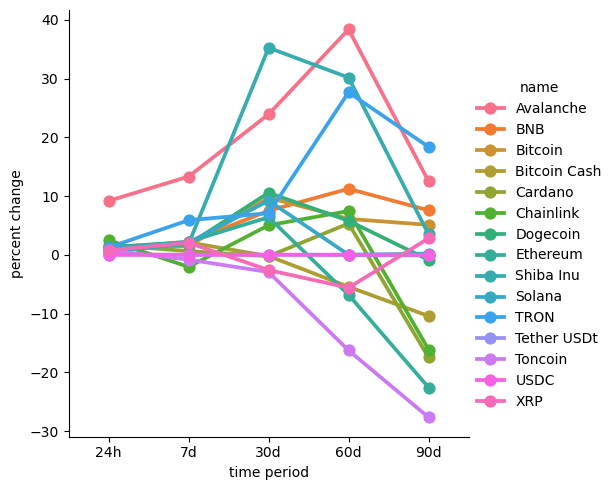

In [274]:
df8 = df7.query("name == ['Bitcoin','BNB','TRON']")
import seaborn as sns

sns.catplot(x='time period',y='percent change',data = df7,hue = 'name',kind = 'point')

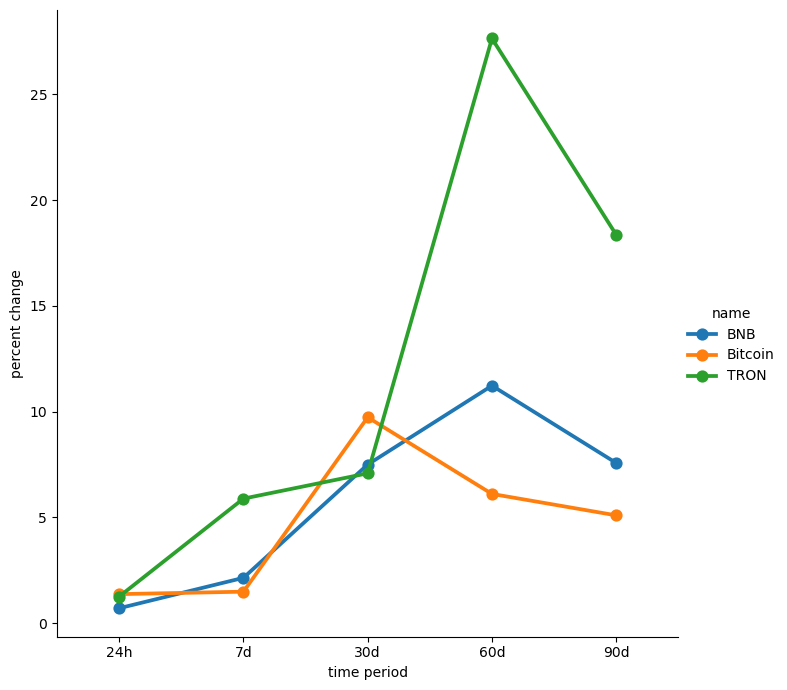

In [289]:
sns.catplot(y='percent change',x='time period',kind='point',hue='name',data = df8,height = 7)